<a href="https://www.kaggle.com/code/madseth/most-subscribed-youtube-channels?scriptVersionId=125269165" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [3]:
df =  pd.read_csv("../input/most-subscribed-1000-youtube-channels/topSubscribed.csv")
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
#Let's find how many rows and columns are there in our data
df.shape

(1000, 7)

# Clean and Prepare Data
Need to clean data in "Subscribers", "Video Views" and "Video Count" to remove "," and change its type to int for further analysis

In [6]:
cols = ["Subscribers", "Video Views", "Video Count"]
for i in cols:
    df[i] = df[i].str.replace(",","")

df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012


In [7]:
#changing the datatype to int64
for i in cols:
    df[i] = df[i].astype("int64")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   int64 
 3   Video Views      1000 non-null   int64 
 4   Video Count      1000 non-null   int64 
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [9]:
df['Category'].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', 'Entertainment',
       'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels',
       'Gaming', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [10]:
#we have to replace the irregularities in the category column

df['Category'] = df['Category'].str.replace('https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', "other")


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df['Category'] = df['Category'].str.capitalize()
df['Category'].unique()

array(['Music', 'Film & animation', 'Education', 'Shows', 'Entertainment',
       'Other', 'Gaming', 'People & blogs', 'Sports', 'Howto & style',
       'News & politics', 'Comedy', 'Trailers', 'Nonprofits & activism',
       'Science & technology', 'Movies', 'Pets & animals',
       'Autos & vehicles', 'Travel & events'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   int64 
 3   Video Views      1000 non-null   int64 
 4   Video Count      1000 non-null   int64 
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


In [13]:
#Check null values

df.isnull().sum()

Rank               0
Youtube Channel    0
Subscribers        0
Video Views        0
Video Count        0
Category           0
Started            0
dtype: int64

In [14]:
df.describe()

,Rank,Subscribers,Video Views,Video Count,Started
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.158140e+07,9.994912e+09,9416.228000,2012.594000
std,288.819436,1.662556e+07,1.300546e+10,32190.909114,4.110238
min,1.000000,1.140000e+07,0.000000e+00,0.000000,1970.000000
25%,250.750000,1.340000e+07,3.871470e+09,365.500000,2010.000000
50%,500.500000,1.660000e+07,6.723360e+09,896.000000,2013.000000
75%,750.250000,2.320000e+07,1.223052e+10,3277.250000,2015.000000
max,1000.000000,2.340000e+08,2.129003e+11,342802.000000,2021.000000


In [15]:
df = df[df['Video Views'] != 0]

In [16]:
df['Category'].value_counts()

Entertainment            238
Music                    217
People & blogs           132
Gaming                    94
Comedy                    68
Film & animation          48
Education                 45
Howto & style             43
News & politics           27
Other                     23
Science & technology      18
Shows                     14
Sports                    10
Pets & animals             6
Trailers                   2
Nonprofits & activism      2
Movies                     2
Autos & vehicles           1
Travel & events            1
Name: Category, dtype: int64

In [17]:
df['Started'].value_counts()

2014    120
2015     93
2011     87
2013     82
2012     81
2016     76
2006     68
2017     62
2009     59
2018     50
2010     45
2007     45
2008     45
2019     30
2005     21
2020     15
2021     11
1970      1
Name: Started, dtype: int64

In [18]:
# 1970 is an outlier and therefore we need to remove it from the dataframe

df.drop(df[df['Started'] == 1970].index, axis = 0, inplace = True)


In [19]:
df['Started'].value_counts()

2014    120
2015     93
2011     87
2013     82
2012     81
2016     76
2006     68
2017     62
2009     59
2018     50
2008     45
2007     45
2010     45
2019     30
2005     21
2020     15
2021     11
Name: Started, dtype: int64

In [20]:
df.shape

(990, 7)

# Data Visualization 

# Number of Channels started over the years

In [21]:
#Need to group data as per the year when the channel started

var1 = df.groupby(['Started'])['Youtube Channel'].count()
var1 = var1.reset_index()

fig1 = px.bar(var1, x = 'Started', y = 'Youtube Channel', template='plotly_dark')
fig1.show()

# Total Video Views and Total Subscibers by Category

In [22]:
var2 = df.groupby(['Category']).agg({'Video Views': 'sum', 'Subscribers': 'sum'}).sort_values(by=['Video Views'], ascending=False)
var2 = var2.reset_index()

fig2 = px.scatter(var2, x="Subscribers", y="Video Views", size="Video Views", color="Category",log_x=True, size_max=40,
                 title="Video views and Subscribers By Category", template='plotly_dark')
fig2.show()


# Distribution of Subscribers in Each Category

In [23]:
px.box(df, y="Subscribers", x="Category", color="Category", title="Subscribers distribution by category", template='plotly_dark')

# Distribution of Video Views in Each Category

In [24]:
px.box(df, y="Video Views", x="Category", color="Category", title="Video Views distribution by category", template='plotly_dark')

# Video Views and Subscibers by Youtube Channel

In [25]:
fig3 = px.scatter(df, x="Subscribers", y="Video Views", size="Video Views", color="Youtube Channel",log_x=True,size_max=60,
                 title="Video views and Subscribers By Youtube Channel", template='plotly_dark')
fig3.show()

In [26]:
var4 = df.groupby(['Youtube Channel'])['Subscribers'].sum().sort_values(ascending=False).head(10)
var4 = var4.reset_index()

fig4 = px.pie(var4, values='Subscribers', names='Youtube Channel', title='Youtube Channels with Subscribers', template='plotly_dark')
fig4.update_traces(textposition='inside', textinfo='percent+label')
fig4.update_layout(
    title={
        'text': "Top 10 Youtube Channels with Subscribers",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig4.show()


# Top 10 Channels with maximum Video Views

In [27]:
var5 = df.groupby(['Youtube Channel'])['Video Views'].sum().sort_values(ascending=False).head(10)
var5 = var5.reset_index()

px.bar(var5, x = 'Youtube Channel', y = 'Video Views', template='plotly_dark', )

# Number of Youtube Channels in 20M Subscibers Bins

In [28]:
px.histogram(df, x="Subscribers", title="Number of Youtube Channels in Subsciber Count Category", nbins=20 ,template='plotly_dark')


# Correlation Heatmap

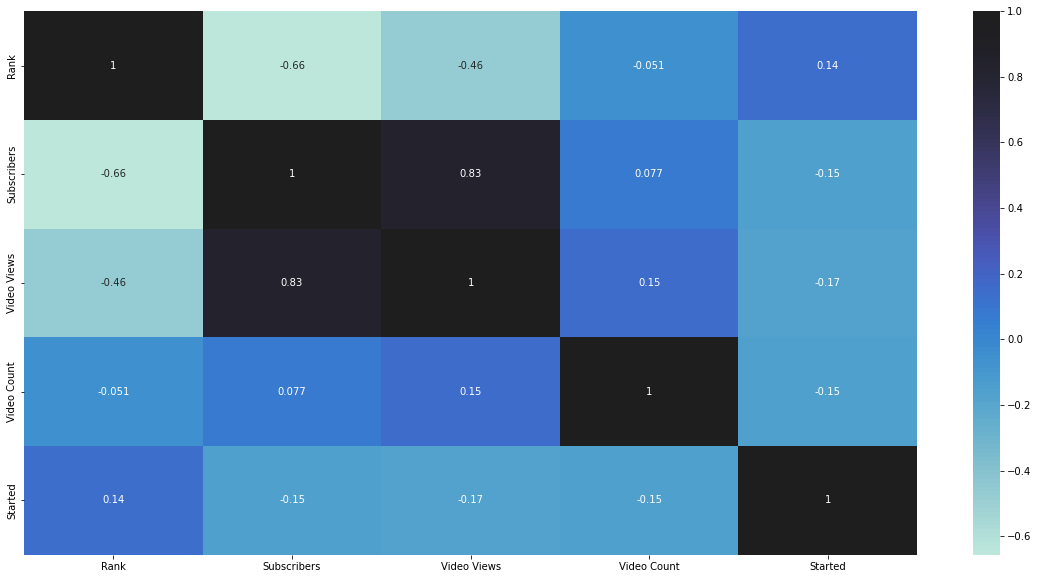

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, center=True);

In [30]:
fig6 = px.scatter_matrix(df)
fig6.update_layout(
    width=1000,
    height=1000,
)

# Insights 

* Among the YouTube channels included in the dataset, 120 were launched in 2014, the most for any given year.

* Music, Entertainment, and People, and Blogs are the top three categories in terms of total video views and total number of subscribers. 

* Music has the most views out of any category.

* The top three most subscribed channels are T-series, Cocomelon Nursery Rhymes, and SET India. 

* There are 658 Youtube channels with fewer than 20 million subscribers, and 267 with between 20 and 40 million subscribers. 

* It is apparent that video views and subscriber numbers are directly related. That means that as the number of subscribers grows, so will the number of video views. 

